In [3]:
import matplotlib.pyplot as plt
import numpy as np

## SOEE3250/SOEE5675M/SOEE5116					2024/25

Inverse Theory

# Practical 1: Inversion by trial and error

In this practical you will learn how to set up an inverse problem, and use Python to ‘solve’ the inverse problem by running the associated forward problem multiple times. 
 
## Background
You are tasked with monitoring surface deformation at a potential sinkhole.  You set up a benchmark at a point ($P_0$) in the centre of the sinkhole and using a laser range finder, you measure the distance to $P_0$ from 4 points $P_1$ to $P_4$. Points $P_1$ to $P_4$ should be considered known and are not part of the data vector. You would like to know the 3D position of $P_0$: this is an inverse problem. Your measurements are not your parameters of interest, but are related to them. The  positions of $P_1$-$P_4$ and the range to $P_0$ are 

| Point   |  X(m)  |   Y(m)  |  Z(m) | Range(m) |
| :------ |:------:|:------:|:------:|---------:|
|$P_1$  |110 |-65   |20  | 370.2 |
|$P_2$  |172  |423   |25  |392.8|
|$P_3$|826 |-143   |40  |482.4
|$P_4$|698 |354   |35  |360.8|



##### Q1) Write down the vector $m$ of model parameters of interest (model parameters)?

A1) Write your answer here

##### Q2) Define the data $d$ vector (i.e. the measurements) in Python by amending the code below

In [ ]:
d = np.array([1,2,3,4])

##### Q3) We now need to write down the forward problem. 
Recall that the distance in 3D between two points $(x_1, y_1, z_1)$ and $(x_2, y_2, z_2)$ is
$\sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$. 

Write down the equation that relates the 3 coordinates of the unknown point ($P_0$) to the range from point $P_1$. Also, by amending the equation, write down formulae for the other points, $P_2$, $P_3$ and $P_4$. 

##### Q4) Look at the model and data vectors.
Are they the same size?
Is this a linear or non-linear problem (i.e. can you reformulate it in the form $d=Gm$, where $d$ is the vector of data and $m$ is the vector of the model parameters)?

A5) Write your answers here

Here is the outline of a function that takes a column vector, $m$, as input and outputs a column vector of ranges ($d_{hat}$) that would be expected at points $P_1$ to $P_4$. The function is not finished - by adding more lines complete the function.

In [66]:
import numpy as np
def compute_ranges(m):
    """Computes the ranges from the points P1, P2, P3 and P4.
    Returns a vector with 4 elements"""
    x1,y1,z1 = 110, -65, 20
    range1 = np.sqrt((x1-m[0])**2+(y1-m[1])**2+(z1-m[2])**2 )
    # Amend the function to return the ranges to points 1-4.
    return([range1])

Here's an example of the function running, calculating the distance between the point [1,2,3] and the points $P_1$ to $P_4$.

In [56]:
compute_ranges([1,2,3])

[129.06974858579372]

##### Q5) Now we are in a position to trial some reasonable values for our model vector m. To get a rough idea of where $P_0$ is located, amend the Python code below to plot the $(x,y)$ positions of $P_1$-$P_4$.

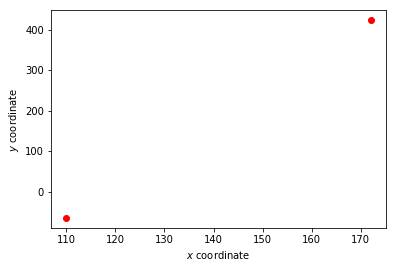

In [81]:
plt.figure()
plt.plot((110, 172), (-65, 423), 'o',color='red')
plt.ylabel('$y$ coordinate')
plt.xlabel('$x$ coordinate');

# The code currently only plots $P_1$ and $P_2$.

##### Q6) Now guess where $P_0$ is located (you will also need to guess the $z$-coordinate) as m_trial and calculate the vector of ranges from the forward model, d_hat.

##### Q7) Your answer above will not likely agree with the data vector. Subtract the result above d_hat from d.  These values are known as residuals. Calculate the sum of the residuals squared. This is known as the residual sum of squares (RSS) and is a measure of how well your model parameters fit the data (lower is better). 

In [4]:
# This computes the squares of the elementwise difference, then adds up the values:
RSS = np.sum(  (d-d_hat)**2 )

NameError: name 'd' is not defined

##### Q8) Adjust your guess for the coordinates of $P_0$, then recalculate the RSS. Has the RSS increased or decreased? Keep trying new guesses and see how low you can make the RSS. 

A8) Enter your answer here.

##### Q9) Now we will try to find a low-RSS model using a randomised approach. The Python code below will generate 10000 models. For each, calculate the RSS and find the model with the minimum RSS. Plot this point, an approximation to $P_0$, along with $P_1$ - $P_4$.


In [93]:
import random
import numpy as np
N = 1000
random.seed(1) #seed the random number generator
models = np.zeros((3,N))
RSS = np.zeros(N)
for i in range(N):
    models[0,i] = random.uniform(0,1000)
    models[1,i] = random.uniform(-200,400)
    models[2,i] = random.uniform(0,50)
    RSS[i] = 0 #calculate RSS here

# Find minimum
min_index = RSS.argmin()
min_model = models[:,min_index]
    
# plot
plt.figure()
plt.plot((110, 172), (-65, 423), 'o',color='red')
plt.ylabel('$y$ coordinate')
plt.xlabel('$x$ coordinate');
# plot minimum model here
plt.plot( min_model[0], min_model[1],'o',color='blue')